In [2]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
%matplotlib inline

In [3]:
def trl_dvsn(n):
    
    isprime = True
    cnt = 2
    
    while isprime and cnt < n:
        if n%cnt == 0:
            isprime = False
        else:
            cnt += 1
    
    return isprime

**Problem 1** (3pts for each part): As we covered in class, for a given natural number $n\in \mathbb{N}$, we say it is prime if its only divisors are $1$ and itself.  Otherwise, we say the number is composite.  Likewise, we have the _Fundamental Theorem of Arithmetic_, which says that for any $n\in\mathbb{N}$, $n$ has a prime factorization so that 
$$
n = p_{1}^{k_{1}}\cdots p_{j}^{k_{j}}, ~ k_{j}\in \mathbb{N}
$$
where each $p_{l}$ is prime and the decomposition is unique modulo rearranging the order of the terms.  Show

* If $n$ is composite, show there is a prime factor $p_{j}$ such that $p_{j}\leq\sqrt{n}$.
* If $n>6$ and $n$ is prime, show that there is some $k\in\mathbb{N}$ such that $n=6k+1$ or $n=6k+5$.

$1a.$
<br>
If n is composite, and assume $p_{j} < p_{j+1}$
$$
n = p_{1}^{k_{1}}\cdots p_{j}^{k_{j}}, ~ k_{j}\in \mathbb{N} \\
n \geq  p_{1} ^ {\sum_{l=1}^{j} k_{l}} \geq p_{1}^{2} \\
$$
so...
$$
n \geq  p_{1}^{2} \\
\sqrt{n} \geq p_{1}
$$
Thus there is a prime factor $p_{j}$ such that the result is given
<br>
<br>

$1b.$
<br>
Assume $n > 6$ 
<br>
Let $k\in\mathbb{N}$ 
<br>

$\forall n > 6$

\begin{align}
n =& 6k  =& 2(3k) \\
n =& 6k + 1 \\
n =& 6k + 2  =& 2(3k + 1)\\
n =& 6k + 3  =& 3(2k + 1)\\
n =& 6k + 4 =& 2(3k + 2)\\
n =& 6k + 5 \\
\end{align}

All Forms of $n$ have prime factorization, making it composite, except for $n = 6k + 1$ and $n = 6k + 5$
<br>
meaning that $n$ is prime such that $n = 6k + 1$ and $n = 6k + 5$


**Problem 2** (10pts): Using the code provided below and the results from Problem 1, 

* Implement a better test of whether a number is prime than the simple trial division algorithm provided above at the beginning of the notebook. Briefly explain the `if n>=49 and n<121` and `elif n>=121` checks as well.  (4pts)  

* Develop several test cases using both the simple algorithm and your new one to make sure your new algorithm is correct.  (3pts)

* For $2\leq n \leq 10^{5}$, compare the difference in times between your new algorithm and the simple one.  Make a semilog plot of the time differences.  Describe any trends you see from your plot.  (3pts)

In [4]:
def bttr_trl_dvsn(n):
    
    isprime = True
    nsq = np.sqrt(n)
    
    if n%2 == 0 or n%3 == 0 or n%5 == 0:
        if n!=2 and n!=3 and n!=5:
            isprime = False
    else:
        
        kmax = 0
        if n>=49 and n<121:
            kmax = int(np.floor((nsq-1.)/6.))
        elif n>=121:
            kmax = int(np.floor((nsq-5.)/6.))
        
        if kmax > 0:
            for kk in range(0,kmax):
                tstnmbr = 6*(kk+1)+1
                if n%tstnmbr == 0:
                    isprime = False 
                    break
                else:
                    tstnmbr = 6*(kk+1)+5
                    if tstnmbr <= nsq:
                        if n%tstnmbr == 0:
                            isprime = False 
                            break
    
    return isprime

In [5]:
bttr_trl_dvsn(67)

True

Text(0, 0.5, '$\\log{(Times)}$')

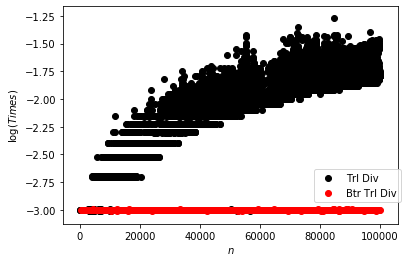

In [6]:
nmax = int(1e5) # This will take a second to run. 
nvals = np.arange(2,nmax+1)
nlen = nvals.size
timesstd = np.zeros(nlen)
timesbtr = np.zeros(nlen)

for jj in range(nlen):
    start = time()
    trl_dvsn(jj)
    end = time()
    timesstd[jj] = end-start
    
    start  = time()
    bttr_trl_dvsn(jj)
    end = time() 
    timesbtr[jj] = end-start
    
plt.scatter(nvals,np.ma.log10(timesstd),color='k', label = "Trl Div")
plt.scatter(nvals,np.ma.log10(timesbtr),color='r', label = "Btr Trl Div")
plt.legend(loc=(.75 , .1))
plt.xlabel('$n$')
plt.ylabel('$\log{(Times)}$')

This shows that the better trial divison is faster by a factor about 10.  And that the time for the better trial divison is more consistent than the normal trial divison function.